In [123]:
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

In [124]:
in_index = {}
in_images = {}
for imagePath in glob.glob("EmojiImages" + "/*.png"):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
    if image is None:
        continue
    in_images[filename] = image
 
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist,hist).flatten()
    in_index[filename] = hist
print("OK")

OK


In [125]:
out_index = {}
out_images = {}
for imagePath in glob.glob("OutputImage" + "/*.png"):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
    if image is None:
        continue
    out_images[filename] = image
 
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist,hist).flatten()
    out_index[filename] = hist
print("OK")

OK


In [126]:
for j in range(0,1500,10):
    for i in range(0,1200,10):
        
        results = {}
        for (k, hist) in in_index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
            d = cv2.compareHist(out_index[str(i) + "_" + str(j) + ".png"], hist, cv2.HISTCMP_CORREL)
            results[k] = d
        results = sorted([(v, k) for (k, v) in results.items()], reverse = True)
        new_im = in_images[results[0][1]]
        cv2.imwrite("OUT/" + str(i) + "_" + str(j) + ".png", new_im)
        
    
    # show the query image
#     fig = plt.figure("Query")
#     ax = fig.add_subplot(1, 1, 1)
#     ax.imshow(images["test_im.png"])
#     plt.axis("off")
 
#     # initialize the results figure
#     fig = plt.figure("Results: %s" % (methodName))
#     fig.suptitle(methodName, fontsize = 20)
 
#     # loop over the results
#     for (i, (v, k)) in enumerate(results):
#         # show the result
#         ax = fig.add_subplot(1, len(images), i + 1)
#         ax.set_title("%s: %.2f" % (k, v))
#         plt.imshow(images[k])
#         plt.axis("off")
        
#         c_im = img[j:j+50,i:i+50]
#         c_im = cv2.resize(c_im,(160,160))
#         cv2.imwrite("OutputImage/" + str(i) + "_" + str(j) + ".png", c_im)

/usr/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


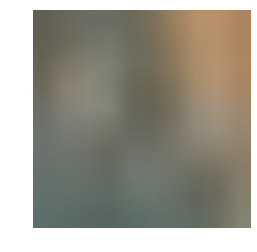

KeyboardInterrupt: 

In [71]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT), 
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
 
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
    # initialize the results dictionary and the sort
    # direction
    results = {}
    reverse = False
 
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True
        
    for (k, hist) in index.items():
        # compute the distance between the two histograms
        # using the method and update the results dictionary
        d = cv2.compareHist(index["test_im.png"], hist, method)
        results[k] = d
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
    
    # show the query image
    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images["test_im.png"])
    plt.axis("off")
 
    # initialize the results figure
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize = 20)
 
    # loop over the results
    for (i, (v, k)) in enumerate(results):
        # show the result
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%s: %.2f" % (k, v))
        plt.imshow(images[k])
        plt.axis("off")
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)